# **Dataset preparation and EDA**

# Data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle
!echo '{"username":"gordon0","key":"a9ab7d772a12f2e4b38a651f81974c18"}' > ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0


In [ ]:
!unzip lung-and-colon-cancer-histopathological-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc10.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc100.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1000.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1001.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1002.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1003.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1004.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1005.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1006.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1007.jpeg  
  inflating: lung_colon_image_set/lung_image_sets/lung_scc/lungscc1008.jpeg  
  inflating: lung_c

# Directory Structure

In [ ]:
import os
import matplotlib.pyplot as plt

count = 0
base_path = "/content/lung_colon_image_set/"
dirs = os.listdir(base_path)

print("Top-level Directories:", dirs)
print()

for main_dir in dirs:
    main_dir_path = os.path.join(base_path, main_dir)

    second_dirs = os.listdir(main_dir_path)
    print(f"Subdirectories in {main_dir}:", second_dirs)

    for sub_dir in second_dirs:
        sub_dir_path = os.path.join(main_dir_path, sub_dir)

        if not os.path.isdir(sub_dir_path):
            continue

        files = [f for f in os.listdir(sub_dir_path) if os.path.isfile(os.path.join(sub_dir_path, f))]
        print(f"{sub_dir} Folder has {len(files)} Images")
        count += len(files)
    print()

print(f"Total Images in Folder: {count}")


Top-level Directories: ['lung_image_sets', 'colon_image_sets']

Subdirectories in lung_image_sets: ['lung_n', 'lung_scc', 'lung_aca']
lung_n Folder has 5000 Images
lung_scc Folder has 5000 Images
lung_aca Folder has 5000 Images

Subdirectories in colon_image_sets: ['colon_aca', 'colon_n']
colon_aca Folder has 5000 Images
colon_n Folder has 5000 Images

Total Images in Folder: 25000


# Analyzing class distribution

Class 'lung_image_sets' has 15000 images.
Class 'colon_image_sets' has 10000 images.


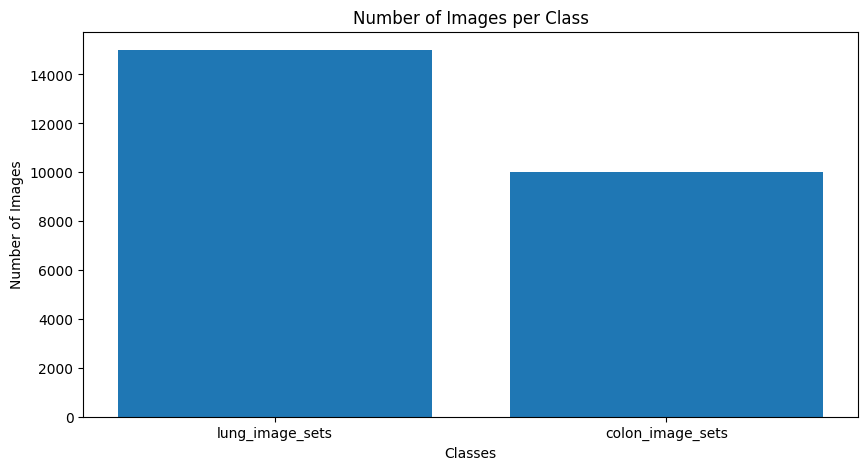

In [ ]:
def count_images_recursive(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        total_images += len([f for f in files if os.path.isfile(os.path.join(root, f))])
    return total_images

class_counts = {class_name: count_images_recursive(os.path.join(base_path, class_name))
                for class_name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, class_name))}

for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.show()


# Viewing sample images

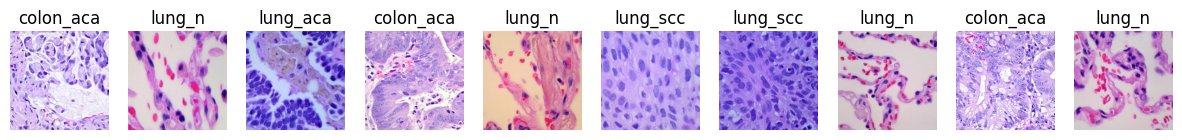

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

def get_all_image_paths(dataset_path):
    """
    Recursively get all image paths from the dataset, including subfolders.
    Returns a list of tuples with (image_path, class_name).
    """
    image_paths = []
    for root, _, files in os.walk(dataset_path):
        class_name = os.path.basename(root)  # Assume class name is the folder name
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Only include valid image formats
                image_paths.append((os.path.join(root, file), class_name))
    return image_paths

def show_images(dataset_path, num_images=20):
    image_paths = get_all_image_paths(dataset_path)

    if not image_paths:
        print("No valid images found.")
        return

    # Randomly sample `num_images` from the image paths
    selected_images = random.sample(image_paths, min(num_images, len(image_paths)))

    plt.figure(figsize=(15, 5))
    for i, (img_path, class_name) in enumerate(selected_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct display

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")

    plt.show()

#base_path = '/content/lung_colon_image_set'


show_images(base_path, num_images=10)


# Checking image size variations and Detecting corrupt files

In [ ]:
import os
from PIL import Image
import numpy as np

image_shapes = []

for root, _, files in os.walk(base_path):
    for img_name in files:
        img_path = os.path.join(root, img_name)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except IOError:
            print(f"Corrupt or unreadable file: {img_path}")

image_shapes = np.array(image_shapes)


print(f"Min Image Size: {image_shapes.min(axis=0)}")
print(f"Max Image Size: {image_shapes.max(axis=0)}")
print(f"Mean Image Size: {image_shapes.mean(axis=0)}")



Min Image Size: [768 768]
Max Image Size: [768 768]
Mean Image Size: [768. 768.]


*   No corrupted or unreadable files found



# Detecting duplicate files



In [ ]:
import os
import hashlib

def md5_hash(image_path):
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

image_hashes = {}  # To store hashes and image paths
duplicates = []  # To store duplicate image pairs



# Iterate over all images in subdirectories and detect duplicates
def detect_duplicates(base_path):
  for class_name in os.listdir(base_path):
      class_path = os.path.join(base_path, class_name)
      if os.path.isdir(class_path):
          for img_name in os.listdir(class_path):
              img_path = os.path.join(class_path, img_name)
              img_hash = md5_hash(img_path)

              # Check if the hash already exists (indicating a duplicate)
              if img_hash in image_hashes:
                  duplicates.append((img_path, image_hashes[img_hash]))  # Store the duplicate and original pair
              else:
                  image_hashes[img_hash] = img_path

  # Print the duplicate image pairs
  if duplicates:
      print(f"Found {len(duplicates)} duplicate images.")
      for dup, original in duplicates:
          print(f"Duplicate: {dup}  |  Original: {original}")
  else:
      print("No duplicate images found.")

detect_duplicates('/content/lung_colon_image_set/colon_image_sets')
detect_duplicates('/content/lung_colon_image_set/lung_image_sets')


Found 475 duplicate images.
Duplicate: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca482.jpeg  |  Original: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca3381.jpeg
Duplicate: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca2889.jpeg  |  Original: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca4887.jpeg
Duplicate: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca3844.jpeg  |  Original: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca3492.jpeg
Duplicate: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca2744.jpeg  |  Original: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca671.jpeg
Duplicate: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca4422.jpeg  |  Original: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca4124.jpeg
Duplicate: /content/lung_colon_image_set/colon_image_sets/colon_aca/colonca1778.jpeg  |  Original: /content/l

# Analyzing color distribution (maybe can be use in handling diverse imaging modalities in stage 2 and 3)

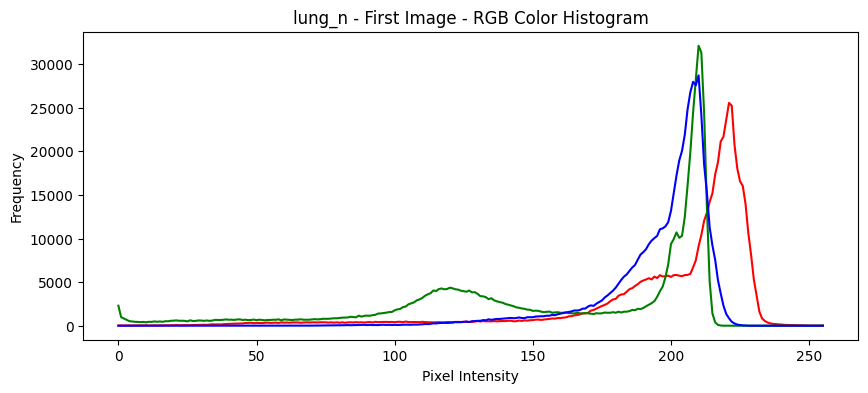

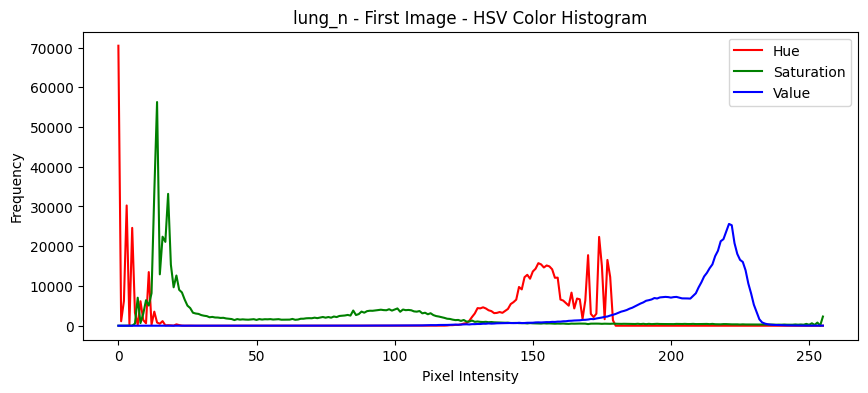

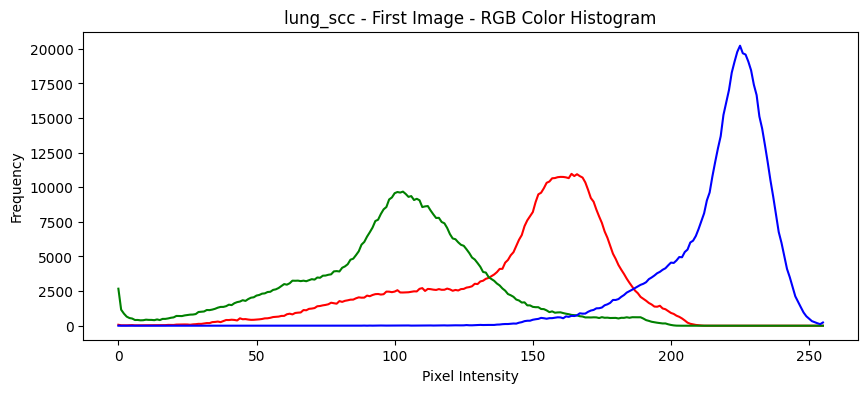

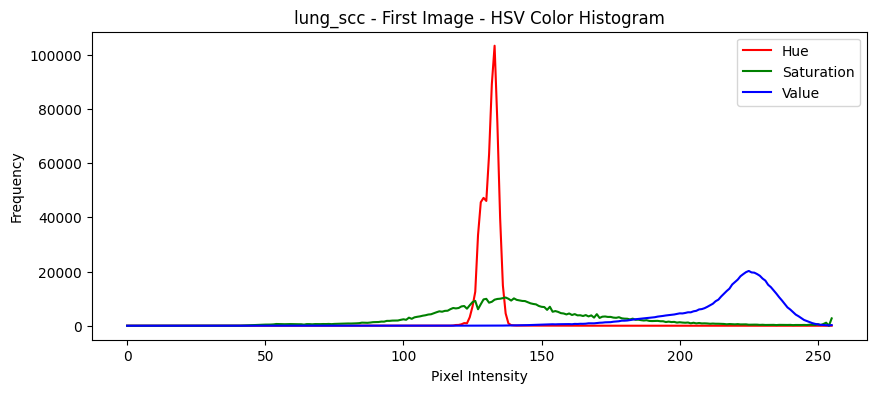

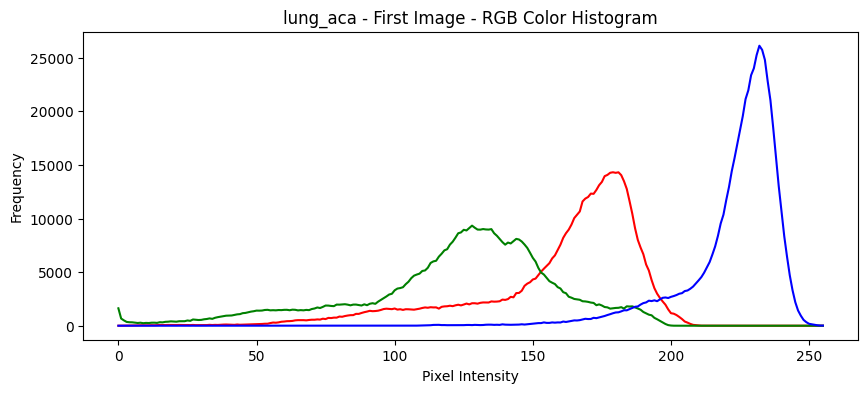

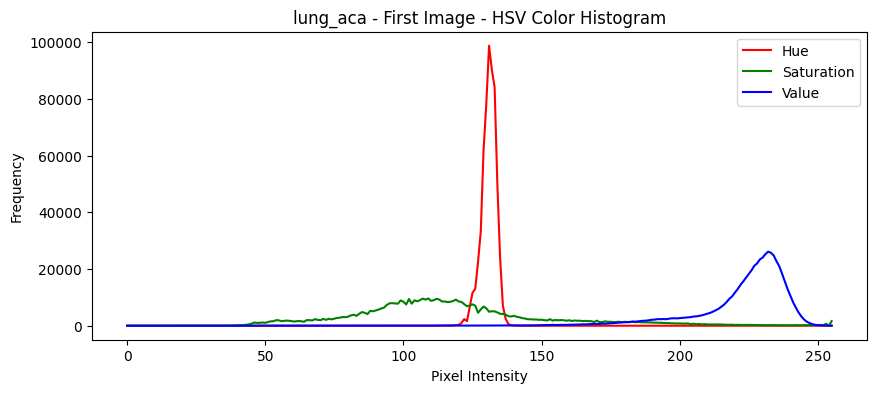

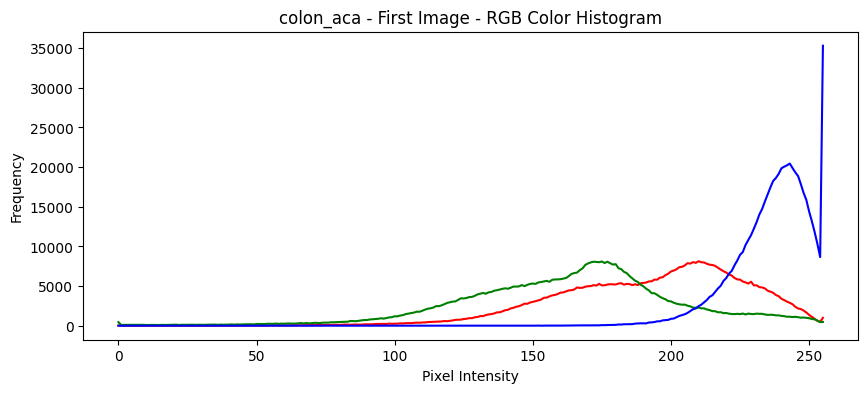

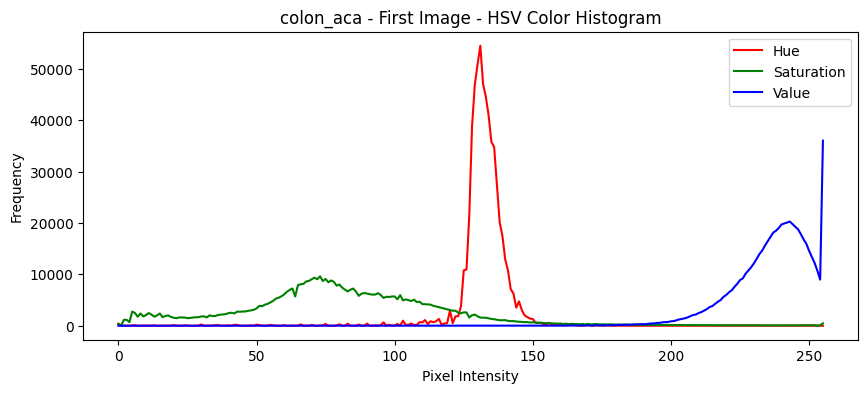

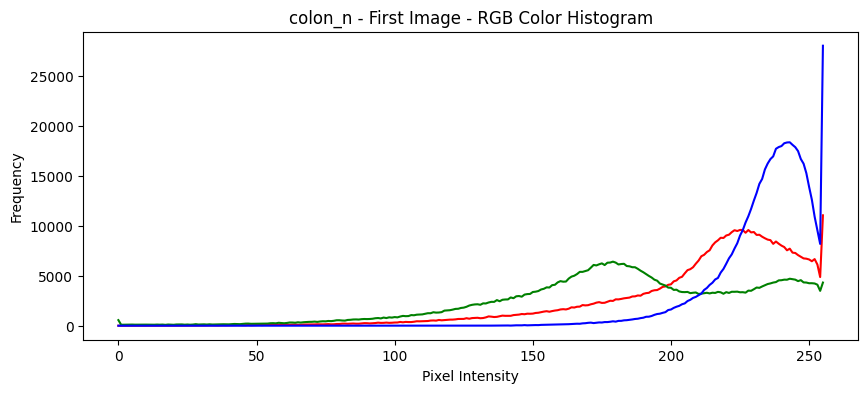

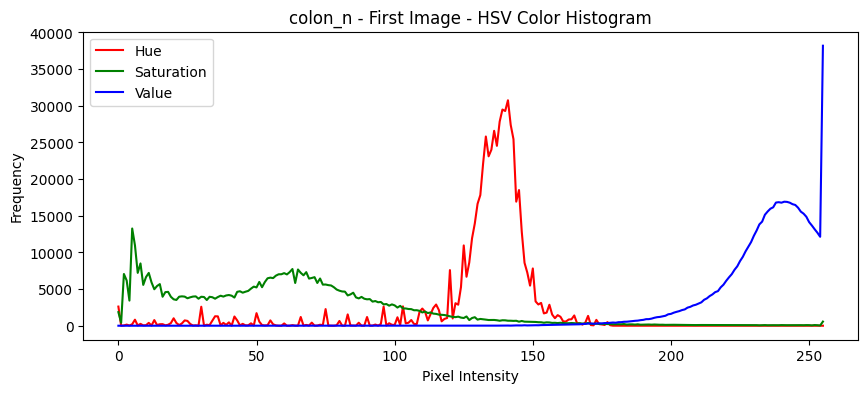

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the base path dynamically
base_path = "/content/lung_colon_image_set"  # Adjust based on the actual dataset location


def plot_rgb_histogram(image, title):

    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 4))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title(f'{title} - RGB Color Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

def plot_hsv_histogram(image, title):

    hsv_channels = ('Hue', 'Saturation', 'Value')
    plt.figure(figsize=(10, 4))
    colors = ('r', 'g', 'b')  # Hue in red, Sat in green, Value in blue

    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color, label=hsv_channels[i])

    plt.title(f'{title} - HSV Color Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Iterate through all directories and analyze images
for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):
        for subclass_name in os.listdir(class_path):
            subclass_path = os.path.join(class_path, subclass_name)
            if os.path.isdir(subclass_path):
                for img_name in os.listdir(subclass_path)[:1]:  # Process first 1 images in each subclass
                    img_path = os.path.join(subclass_path, img_name)

                    # Read and convert the image to RGB
                    img = cv2.imread(img_path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

                    # Plot the RGB histogram
                    plot_rgb_histogram(img_rgb, title=f'{subclass_name} - First Image')
                    plot_hsv_histogram(img_hsv, title=f'{subclass_name} - First Image')


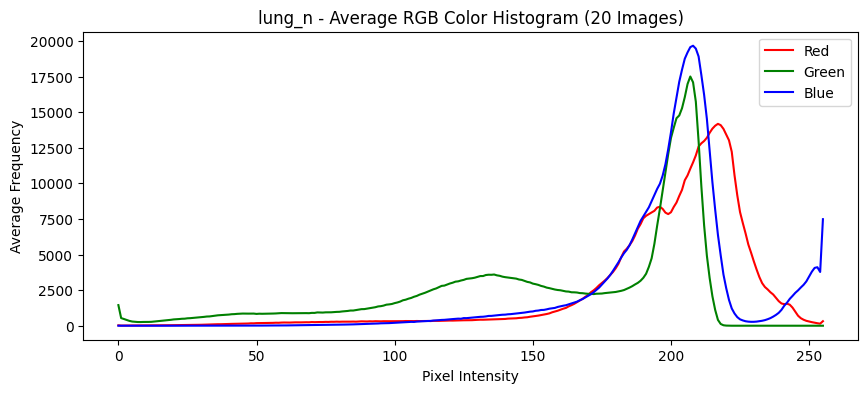

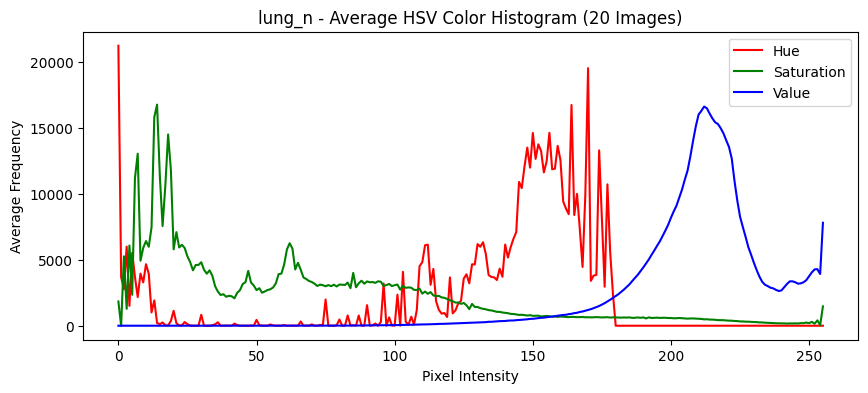

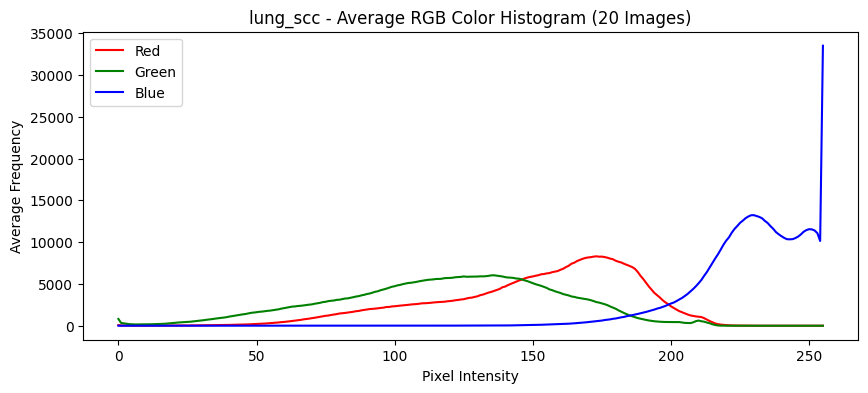

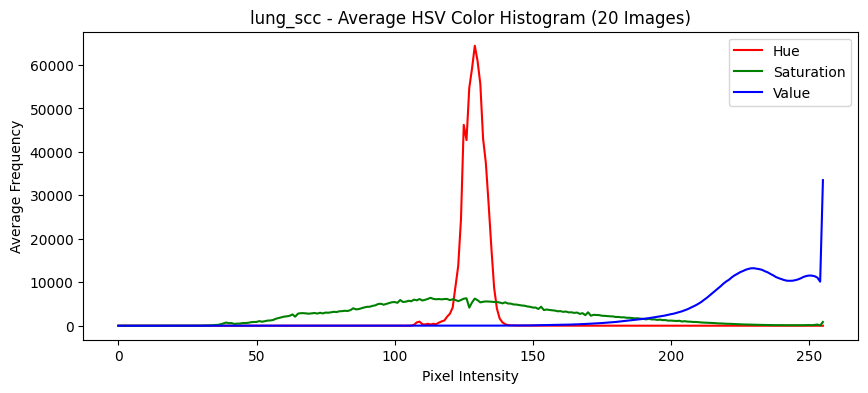

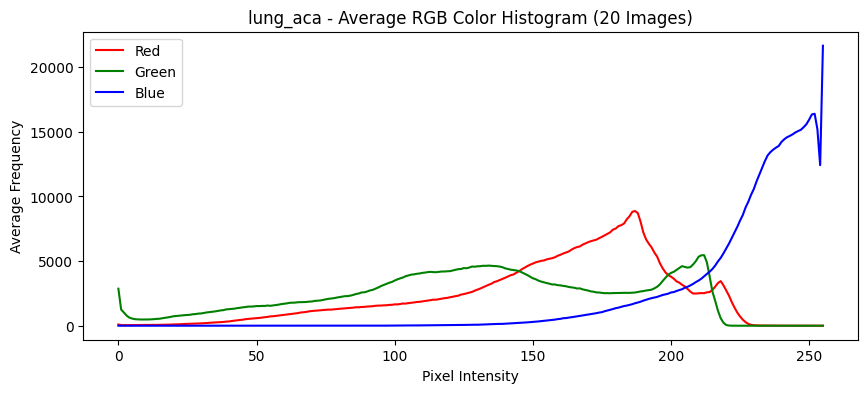

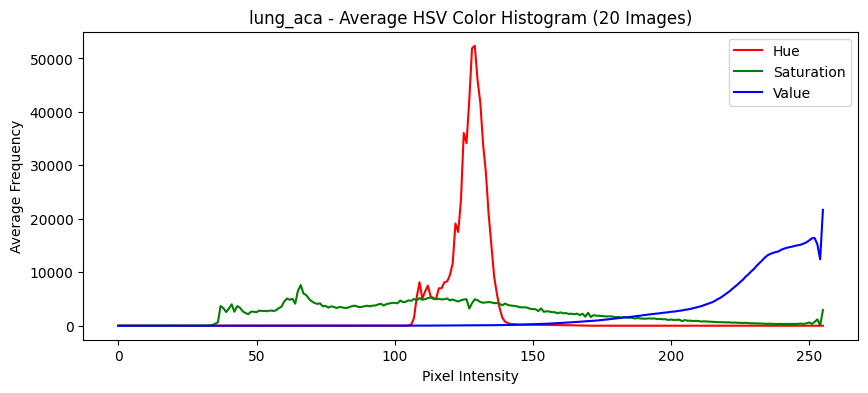

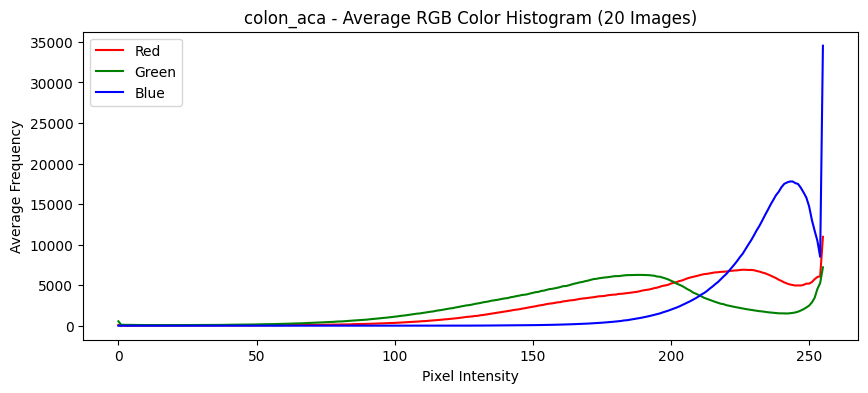

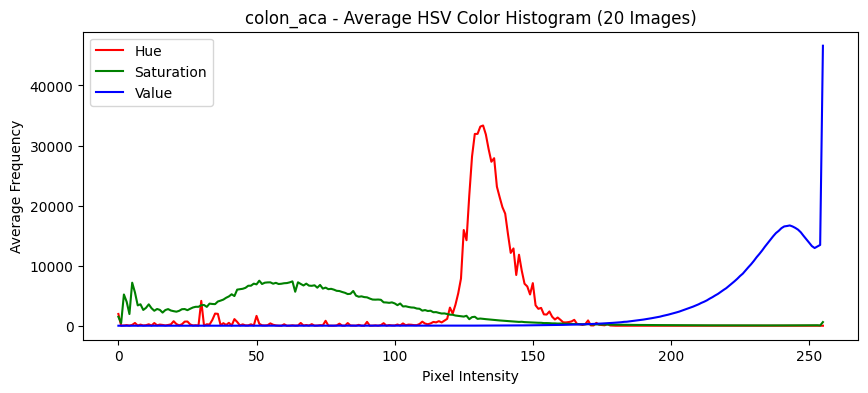

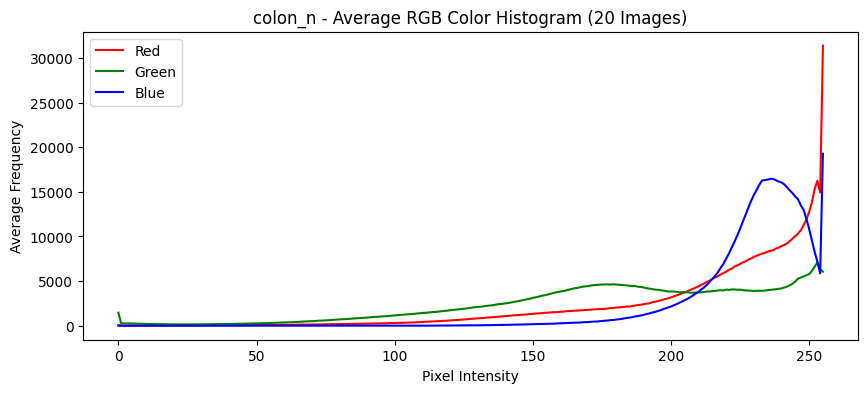

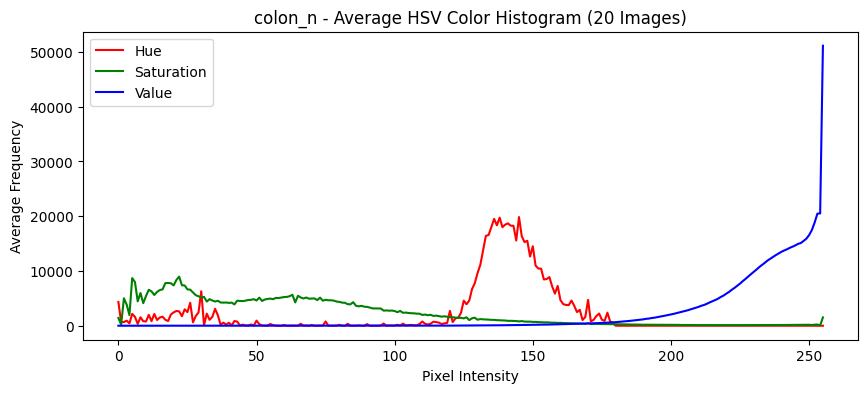

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the base path dynamically
base_path = "/content/lung_colon_image_set"  # Adjust based on the actual dataset location


def plot_average_histogram(hist_r, hist_g, hist_b, title, mode="RGB"):
    """Plot averaged histograms for Red, Green, Blue (RGB) or Hue, Saturation, Value (HSV)."""
    plt.figure(figsize=(10, 4))
    colors = ('r', 'g', 'b') if mode == "RGB" else ('r', 'g', 'b')  # RGB or HSV-style color channels
    labels = ('Red', 'Green', 'Blue') if mode == "RGB" else ('Hue', 'Saturation', 'Value')

    plt.plot(hist_r, color=colors[0], label=f'{labels[0]}')
    plt.plot(hist_g, color=colors[1], label=f'{labels[1]}')
    plt.plot(hist_b, color=colors[2], label=f'{labels[2]}')

    plt.title(f'{title} - Average {mode} Color Histogram (20 Images)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Average Frequency')
    plt.legend()
    plt.show()


# Iterate through all directories and analyze images
for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):
        for subclass_name in os.listdir(class_path):
            subclass_path = os.path.join(class_path, subclass_name)
            if os.path.isdir(subclass_path):
                hist_r_rgb = np.zeros((256, 1))
                hist_g_rgb = np.zeros((256, 1))
                hist_b_rgb = np.zeros((256, 1))

                hist_h_hsv = np.zeros((256, 1))
                hist_s_hsv = np.zeros((256, 1))
                hist_v_hsv = np.zeros((256, 1))

                image_count = 0

                for img_name in os.listdir(subclass_path)[:20]:  # Process first 20 images in each subclass
                    img_path = os.path.join(subclass_path, img_name)

                    # Read and convert the image to RGB and HSV
                    img = cv2.imread(img_path)
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

                    # Calculate RGB histograms
                    hist_r_rgb += cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
                    hist_g_rgb += cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
                    hist_b_rgb += cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

                    # Calculate HSV histograms
                    hist_h_hsv += cv2.calcHist([img_hsv], [0], None, [256], [0, 256])
                    hist_s_hsv += cv2.calcHist([img_hsv], [1], None, [256], [0, 256])
                    hist_v_hsv += cv2.calcHist([img_hsv], [2], None, [256], [0, 256])

                    image_count += 1

                # Compute the average histograms for RGB and HSV
                hist_r_rgb /= image_count
                hist_g_rgb /= image_count
                hist_b_rgb /= image_count

                hist_h_hsv /= image_count
                hist_s_hsv /= image_count
                hist_v_hsv /= image_count

                # Plot the average RGB and HSV histograms
                plot_average_histogram(hist_r_rgb, hist_g_rgb, hist_b_rgb, title=f'{subclass_name}', mode="RGB")
                plot_average_histogram(hist_h_hsv, hist_s_hsv, hist_v_hsv, title=f'{subclass_name}', mode="HSV")
